## 2.1 Average Departure Delay by Airline

- Shows which airline has the highest average departure delay based on actual delay values in the dataset.
- Helps compare airline punctuality and identify carriers that frequently depart late.

In [1]:
import pandas as pd

Flights_data= pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv")


In [2]:
Flights_data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,security_delay,late_aircraft_delay
0,150076.5,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8,-14.0,20.0,25.0,13.0,3,1
1,1.0,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,19,-14.0,20.0,25.0,13.0,3,1
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,8,-14.0,20.0,25.0,13.0,3,1
3,3.0,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,34,-14.0,2.0,25.0,13.0,3,1
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,25,-14.0,20.0,25.0,13.0,3,1


In [3]:
Flights_data[['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'security_delay', 'late_aircraft_delay']].head()

,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,security_delay,late_aircraft_delay
0,8,-14.0,20.0,25.0,13.0,3,1
1,19,-14.0,20.0,25.0,13.0,3,1
2,8,-14.0,20.0,25.0,13.0,3,1
3,34,-14.0,2.0,25.0,13.0,3,1
4,25,-14.0,20.0,25.0,13.0,3,1


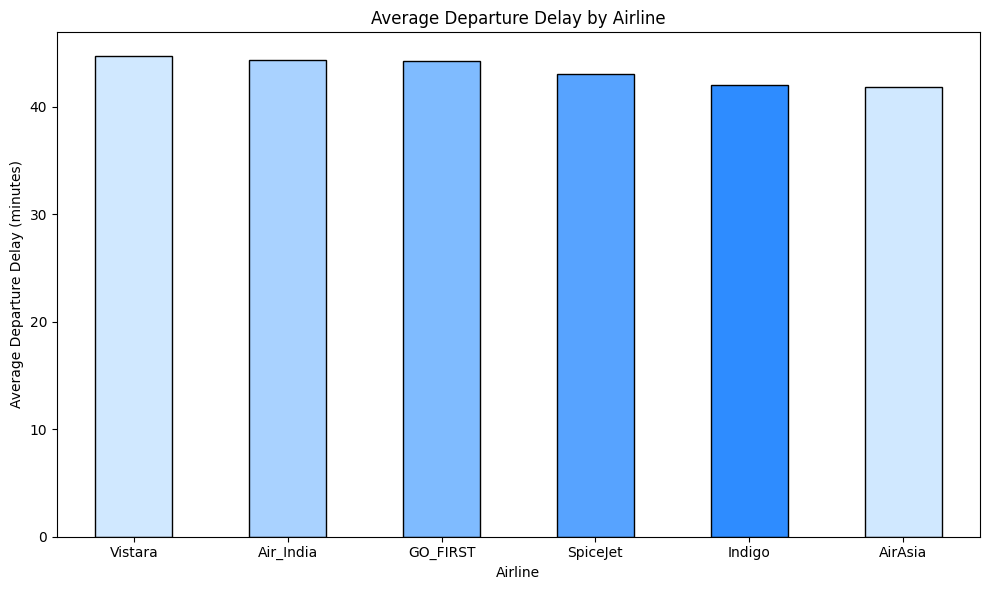

In [4]:
import matplotlib.pyplot as plt

# use the existing column name in the DataFrame
avg_dep_delay = Flights_data.groupby("airline")["DepDelay"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
avg_dep_delay.plot(kind="bar", 
                   color=["#d0e8ff", "#a9d2ff", "#7fbbff", "#57a3ff", "#2e8cff"], 
                   edgecolor="black")

plt.title("Average Departure Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

## 

## 2.2 Average Arrival Delay by Airline

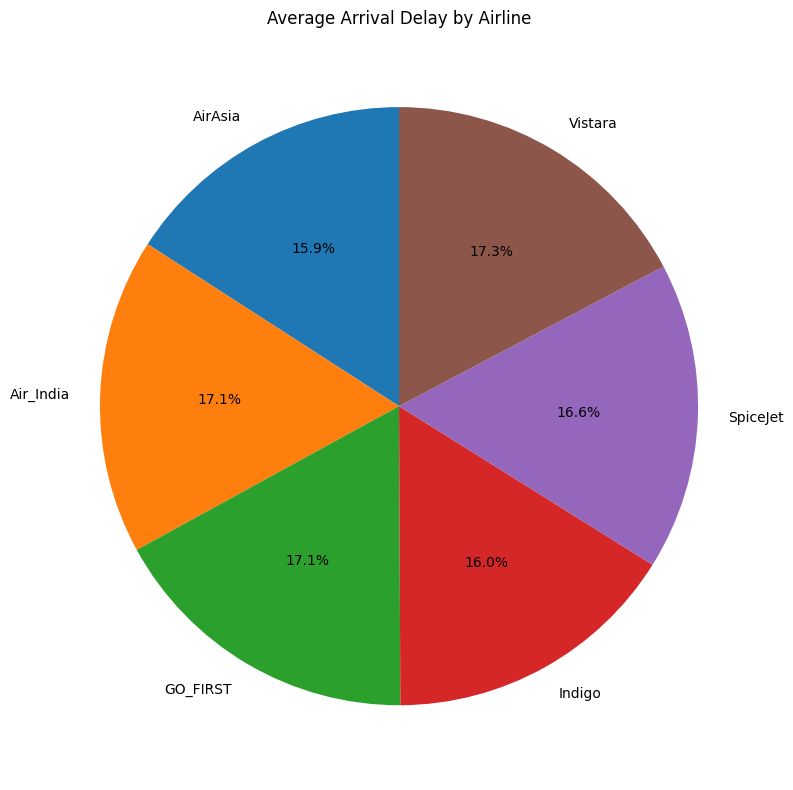

In [8]:


# Load dataset
Flights_data = pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv")

# Compute average arrival delay per airline
avg_arr_delay = Flights_data.groupby("airline")["ArrDelay"].mean()

# Plot Pie Chart
plt.figure(figsize=(10,8))
plt.pie(
    avg_arr_delay,
    labels=avg_arr_delay.index,
    autopct="%1.1f%%",
    startangle=90,
)

plt.title("Average Arrival Delay by Airline")
plt.tight_layout()
plt.show()


## 2.3 Weather Delay by Source City
- Cities with the tallest stacked bars suffer the worst combined delays.
- This helps compare cities not just by weather issues, but also by air-traffic delays.

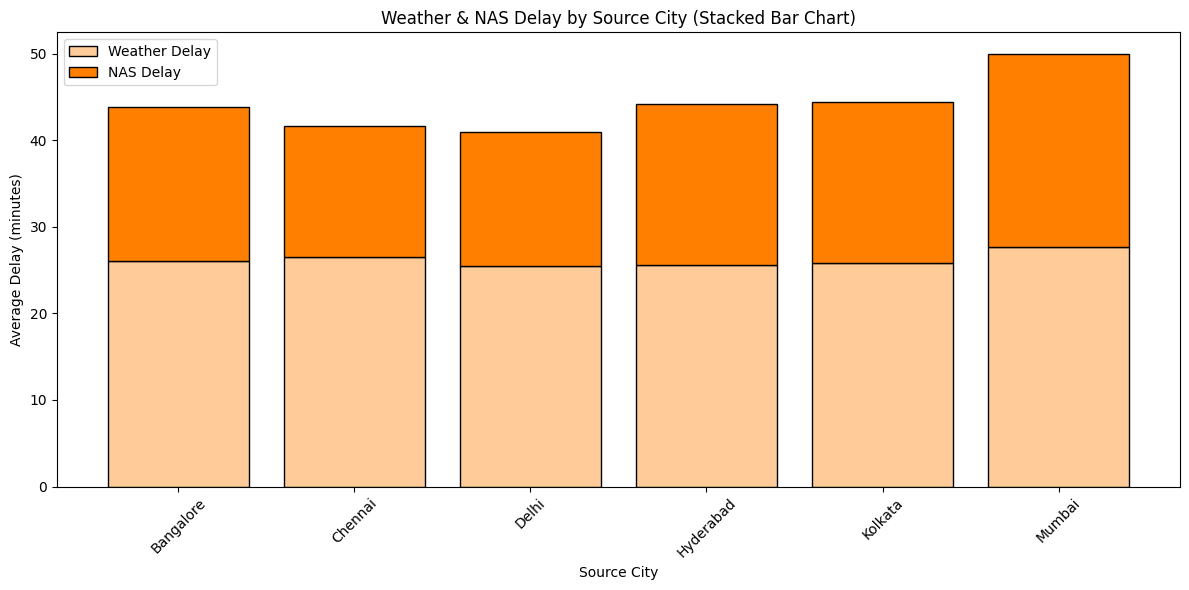

In [4]:
 
import pandas as pd
import matplotlib.pyplot as plt
# Load your dataset
Flights_data = pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv")

# Group by source city and compute delays
weather_delay_city = Flights_data.groupby("source_city")["WeatherDelay"].mean()
nas_delay_city = Flights_data.groupby("source_city")["NASDelay"].mean()
# Create stacked bar chart
plt.figure(figsize=(12,6))

plt.bar(weather_delay_city.index,
        weather_delay_city.values,
        color="#FFCC99",
        edgecolor="black",
        label="Weather Delay")

plt.bar(nas_delay_city.index,
        nas_delay_city.values,
        bottom=weather_delay_city.values,
        color="#FF8000",
        edgecolor="black",
        label="NAS Delay")

plt.title("Weather & NAS Delay by Source City (Stacked Bar Chart)")
plt.xlabel("Source City")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## 2.4 Delay by Time of Day (Morning / Evening / Night)

- Shows the distribution of delays for each time of day, including typical delay and extreme delays (outliers).
- Helps identify which time periods—Morning, Afternoon, Evening, Night—experience heavier delay patterns.

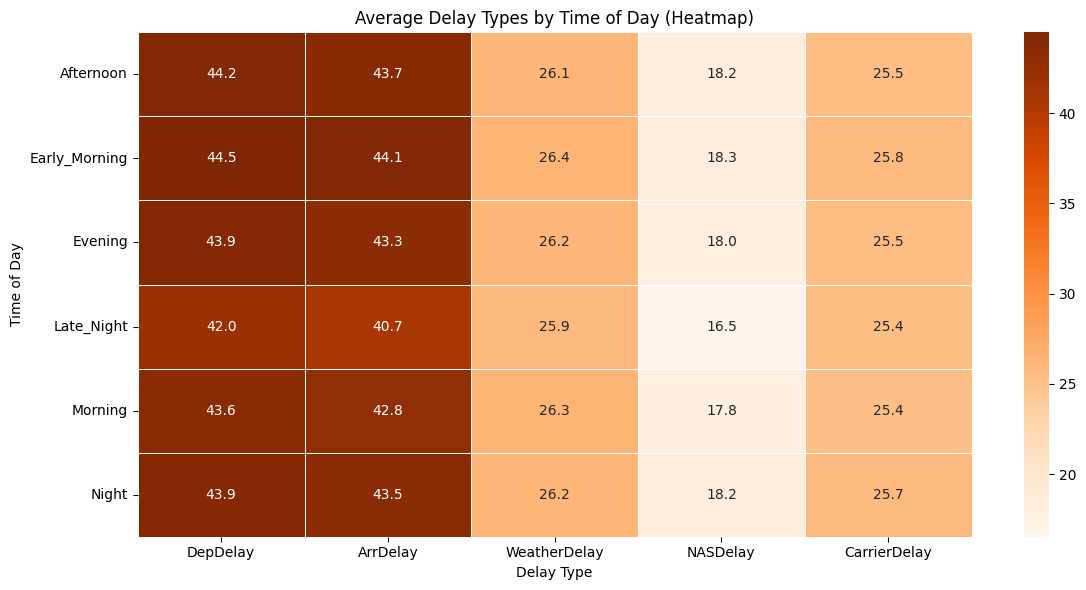

In [11]:

import seaborn as sns

# Load dataset
Flights_data = pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv")

# Select delays + time of day
delay_cols = ["DepDelay", "ArrDelay", "WeatherDelay", 
              "NASDelay", "CarrierDelay"]

# Group by departure time and calculate mean delay for each type
heatmap_data = Flights_data.groupby("departure_time")[delay_cols].mean()

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="Oranges",
    fmt=".1f",
    linewidths=0.5
)

plt.title("Average Delay Types by Time of Day (Heatmap)")
plt.xlabel("Delay Type")
plt.ylabel("Time of Day")
plt.tight_layout()
plt.show()


## 2.5 Total Delay Breakdown (Carrier vs Weather vs NAS vs Security vs Late Aircraft)

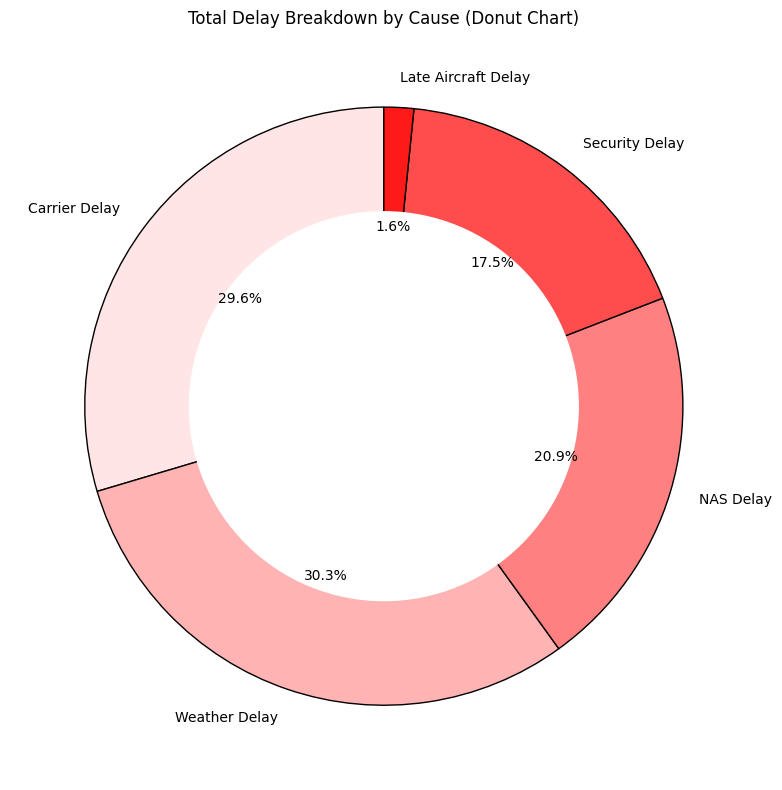

In [17]:
Flights_data = pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv")

# Sum of each delay type
delay_sums = {
    "Carrier Delay": Flights_data["CarrierDelay"].sum(),
    "Weather Delay": Flights_data["WeatherDelay"].sum(),
    "NAS Delay": Flights_data["NASDelay"].sum(),
    "Security Delay": Flights_data["security_delay"].sum(),
    "Late Aircraft Delay": Flights_data["late_aircraft_delay"].sum()
}

labels = list(delay_sums.keys())
sizes  = list(delay_sums.values())

colors = ["#FFE5E5", "#FFB3B3", "#FF8080", "#FF4D4D", "#FF1A1A"]


plt.figure(figsize=(10,8))

# Create pie chart
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'black'}
)

# Create donut hole
centre = plt.Circle((0,0), 0.65, color='white')
plt.gca().add_artist(centre)

plt.title("Total Delay Breakdown by Cause (Donut Chart)")
plt.tight_layout()
plt.show()

## 2.6  Route Delay Analysis (Source → Destination)
- Shows how different delay types (weather, NAS, carrier issues, etc.) contribute to the total delay on each major route, helping identify the main causes behind route-level disruptions.

- Helps compare routes to find the most problematic city pairs, allowing airlines or airports to prioritize improvements on routes where multiple delay factors stack together

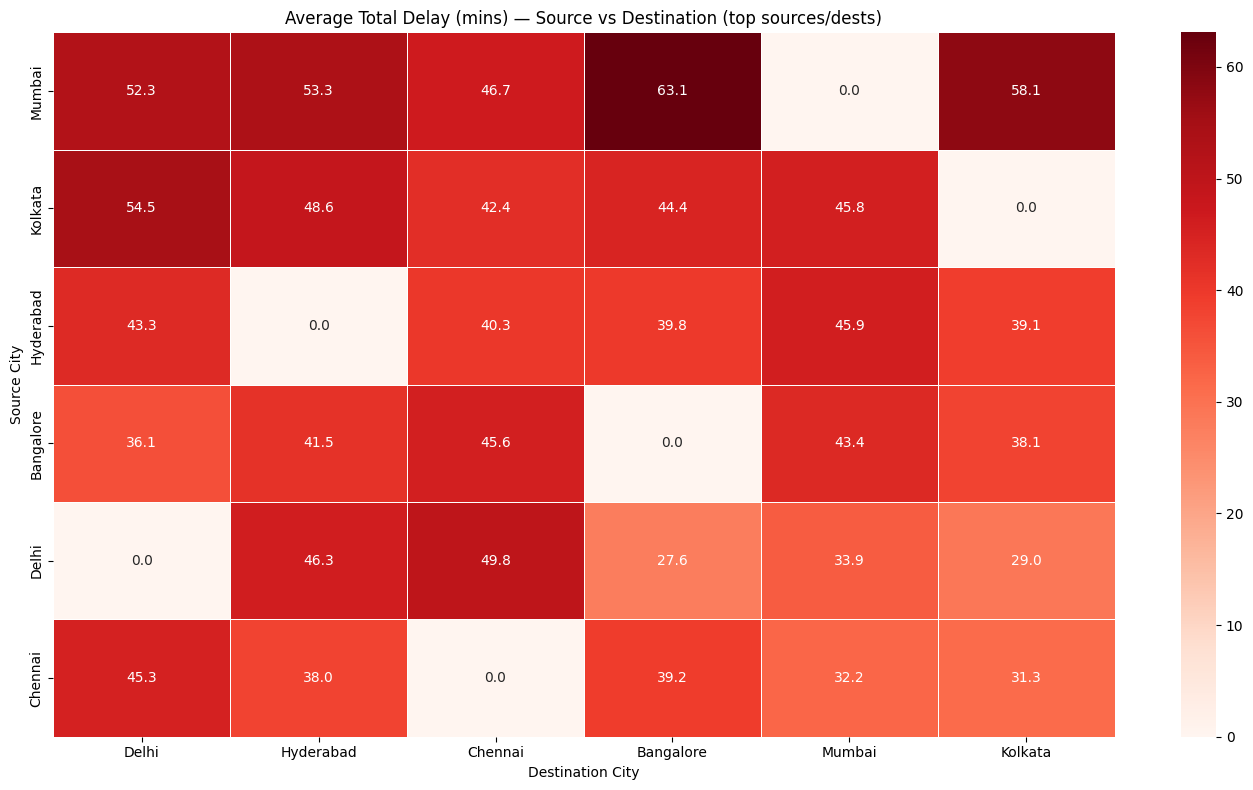

In [19]:
import seaborn as sns
plt.figure(figsize=(14,8))

pivot = Flights_data.pivot_table(index='source_city', columns='destination_city', values='ArrDelay', aggfunc='mean', fill_value=0)
# optionally limit to top k sources/dests
top_sources = pivot.mean(axis=1).sort_values(ascending=False).head(10).index
top_dests   = pivot.mean(axis=0).sort_values(ascending=False).head(10).index
pivot_small = pivot.loc[top_sources, top_dests]

sns.heatmap(pivot_small, annot=True, fmt='.1f', cmap='Reds', linewidths=0.4)
plt.title('Average Total Delay (mins) — Source vs Destination (top sources/dests)')
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.tight_layout()
plt.show()


## 2.7 Airlines Ranked by Total Delay Minutes

 - Calculate each airline’s total delay (all delay types combined).
 - This feels like a final “Who is the worst airline?” visual.

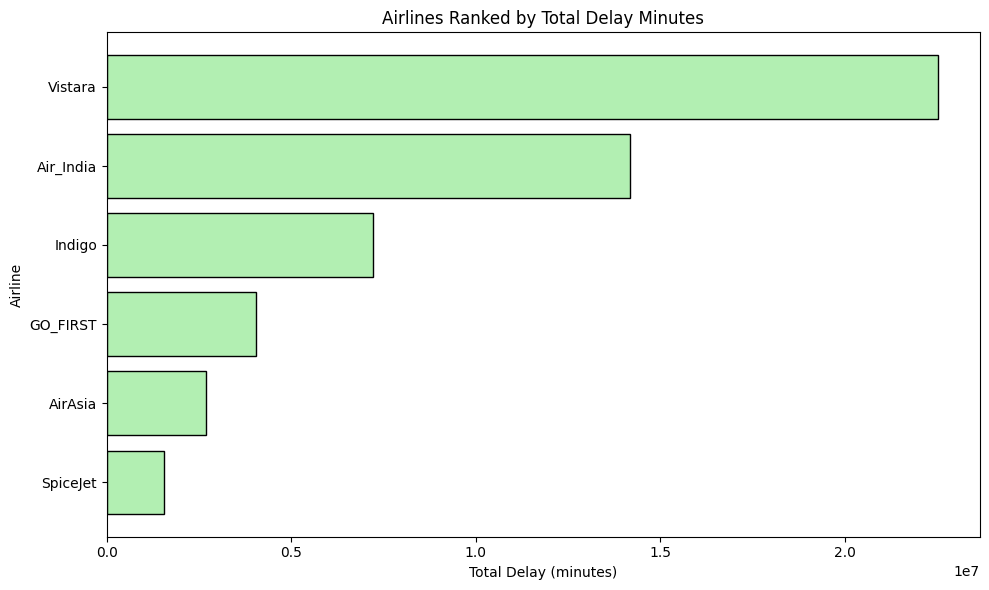

In [24]:


# Load dataset
Flights_data= pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv")

# Calculate total delay per airline
delay_cols = ['DepDelay','ArrDelay','CarrierDelay',
              'WeatherDelay','NASDelay','security_delay','late_aircraft_delay']

Flights_data['delay_cols'] = Flights_data[delay_cols].sum(axis=1)

airline_delay = Flights_data.groupby("airline")["delay_cols"].sum().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(
    airline_delay.index,
    airline_delay.values,
    color = (0.0, 0.8, 0.0, 0.3)   # R, G, B, Alpha(30%)
,
    edgecolor="black"
)

plt.title("Airlines Ranked by Total Delay Minutes")
plt.xlabel("Total Delay (minutes)")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()


## 2.8 KDE of Departure Delay by Class (Economy vs Business)
- Find whether one class faces more delays than the other

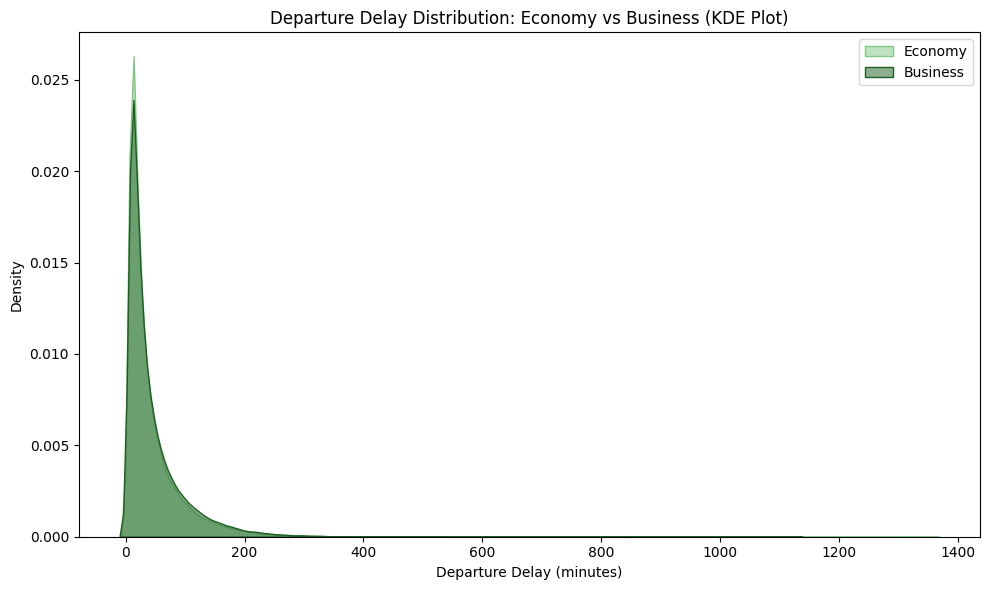

In [26]:


import seaborn as sns

# Load dataset
Flights_data = pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv")

plt.figure(figsize=(10,6))

# KDE curves
sns.kdeplot(
    data=Flights_data[Flights_data["class"] == "Economy"]["DepDelay"],
    fill=True,
    alpha=0.5,
    color="#81C784",
    label="Economy"
)

sns.kdeplot(
    data=Flights_data[Flights_data["class"] == "Business"]["DepDelay"],
    fill=True,
    alpha=0.5,
    color="#1B5E20",
    label="Business"
)

plt.title("Departure Delay Distribution: Economy vs Business (KDE Plot)")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

